In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stcl

import os

%load_ext autoreload
%autoreload 2

## run for all cells (OFF LINE)

run
```
python3 stcl_batch.py [DATASET] --dim D
```

datasets
* 20180618
* 20180621
* 20180626

## choose dataset

In [2]:
# dataset_name = "20180618"
# dataset_name = "20180621"
dataset_name = "20180626"

## load stim and spike data

In [3]:
# data_folder_name = "data"
# stim, spike_train, info = pysta.load_data(dataset_name, data_folder_name)

# # channel_names = [ch.replace("ch_","") for ch in info["channel_names"]]   # NOT NEEDED ANYMORE
# # info["channel_names"]
# # info["cell_types"]

In [4]:
# # calc number of spikes
# tap = 8 # -700 ms ~ 0

# num_samples = list()
# num_spikes = list()
# for idx in range(spike_train.shape[0]):    
#     spike_triggered_stim, spike_count = pysta.grab_spike_triggered_stim(stim, spike_train[idx], tap)
    
#     num_samples.append(spike_triggered_stim.shape[0])
#     num_spikes.append(np.sum(spike_count))

# num_samples_df = pd.DataFrame({"channel_name": info["channel_names"], "number_of_samples": num_samples, "number_of_spikes": num_spikes})
# # num_samples_df

In [5]:
## read largest eigenvalues from STC results

# folder_name = "{}_tap{}_stc_classic".format(dataset_name, tap)

# largest_eigen_values = list()
# second_largest_eigen_values = list()
# third_largest_eigen_values = list()
# for channel_name in info["channel_names"]:
#     filename = "ch_{}_eig_val.txt".format(channel_name)
#     #print(os.path.join(folder_name,filename))    
#     eigs = np.loadtxt(os.path.join(folder_name,filename))
#     largest_eigen_values.append(eigs[0])
#     second_largest_eigen_values.append(eigs[1])
#     third_largest_eigen_values.append(eigs[2])    
# largest_eigen_values_df = pd.DataFrame({"channel_name": info["channel_names"], "eig1": largest_eigen_values, "eig2": second_largest_eigen_values, "eig3": third_largest_eigen_values})

# largest_eigen_values_df.hist()

## read clustering results

In [6]:
tap = 8 # -700 ms ~ 0
cluster_dim = 2

folder_name = "{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, cluster_dim)
filename = os.path.join(folder_name, "clusters.csv")

clusters = pd.read_csv(filename)
# weights
# weights.head()

clusters["max_weight"] = np.maximum(clusters["weight1"], clusters["weight2"])

# # combine number of samples
# clusters = clusters.merge(num_samples_df, on="channel_name") #, how="outer")

# # combine largest eigen values
# clusters = clusters.merge(largest_eigen_values_df, on="channel_name", how="outer")


# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

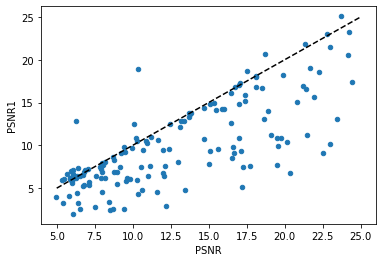

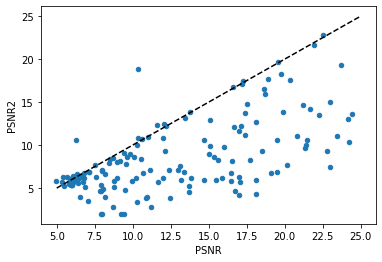

In [7]:
clusters.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

In [8]:
idx_PSNR1_increased = np.where(clusters["PSNR"] < clusters["PSNR1"])
idx_PSNR2_increased = np.where(clusters["PSNR"] < clusters["PSNR2"])

clusters.iloc[np.union1d(idx_PSNR1_increased, idx_PSNR2_increased)]

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight
4,13b,998,OFF,17.037106,1.284069,1.216870,1.162347,True,17.252793,5.708885,0.970916,0.029084,0.632745,0.970916
5,13c,628,ON,17.011753,1.484082,1.419447,1.306825,True,17.103187,4.188339,0.986639,0.013361,0.955795,0.986639
7,13e,112,unknown,5.878484,2.438375,2.330179,2.277194,True,6.226517,5.546053,0.585559,0.414441,-0.774089,0.585559
9,14b,760,OFF,13.728054,1.045665,1.023996,0.965301,True,13.796654,5.292333,0.976511,0.023489,0.500962,0.976511
10,14c,214,ON,10.645620,1.768600,1.759664,1.702648,True,4.741463,10.703179,0.037203,0.962797,0.127063,0.962797
11,14d,73,unknown,5.396635,7.419156,4.245199,3.822157,True,3.222904,6.318851,0.044118,0.955882,0.051923,0.955882
17,17c,394,unknown,6.080982,1.924233,1.897407,1.874901,True,6.439977,5.667680,0.744536,0.255464,0.092296,0.744536
23,21e,138,ON,11.634252,2.547135,2.431784,2.331113,True,4.547916,12.319629,0.057283,0.942717,0.309234,0.942717
24,22a,2860,ON,17.556724,0.838246,0.704459,0.671715,True,18.716530,14.826105,0.647365,0.352635,-0.479533,0.647365
25,22b,2413,unknown,6.267735,0.835159,0.782430,0.732217,True,12.865903,10.592013,0.380812,0.619188,-0.312358,0.619188


In [9]:
clusters.iloc[np.intersect1d(idx_PSNR1_increased, idx_PSNR2_increased)]

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight
25,22b,2413,unknown,6.267735,0.835159,0.782430,0.732217,True,12.865903,10.592013,0.380812,0.619188,-0.312358,0.619188
64,36c,4098,unknown,10.318830,0.798256,0.620102,0.613533,True,18.892517,18.855896,0.524121,0.475879,-0.555696,0.524121
76,42a,15907,unknown,5.962683,0.396756,0.395866,0.390809,True,6.222633,6.069061,0.501863,0.498137,-0.237272,0.501863
78,42c,124,unknown,6.367056,3.195324,2.960704,2.856918,True,6.379001,6.604289,0.758579,0.241421,-0.069444,0.758579
90,48c,231,unknown,5.989198,1.561925,1.505998,1.479852,True,6.191508,6.211054,0.541905,0.458095,-0.588810,0.541905
95,53a,478,unknown,6.074724,1.489253,1.461612,1.373689,True,6.670500,6.399955,0.273461,0.726539,-0.107404,0.726539
105,58a,100,unknown,5.898365,3.890419,3.712038,3.535888,True,6.024095,5.965460,0.728500,0.271500,-0.019761,0.728500
114,63e,47,unknown,5.343132,6.720452,6.690263,5.837721,True,5.913791,5.671454,0.761157,0.238843,-0.259740,0.761157
119,68a,388,unknown,5.704092,1.366515,1.323512,1.292513,True,6.663711,6.323934,0.276135,0.723865,0.111754,0.723865


In [10]:
clusters_with_negative_inner_product = clusters.loc[clusters["inner_product"]<0,:]

print(len(clusters_with_negative_inner_product), len(clusters))
clusters_with_negative_inner_product

71 156


,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight
2,12c,80,OFF,9.580539,2.975778,2.937412,2.898726,True,5.791374,7.856035,0.269754,0.730246,-0.454613,0.730246
3,13a,8830,OFF,16.538420,0.432604,0.424380,0.422611,True,8.558661,8.145098,0.502826,0.497174,-0.210697,0.502826
6,13d,342,unknown,7.128652,1.776912,1.658930,1.647190,True,5.702926,6.904928,0.091953,0.908047,-0.121746,0.908047
7,13e,112,unknown,5.878484,2.438375,2.330179,2.277194,True,6.226517,5.546053,0.585559,0.414441,-0.774089,0.585559
13,16b,234,unknown,6.715108,2.185584,2.136243,1.995541,True,5.242298,6.195681,0.062826,0.937174,-0.015195,0.937174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,82a,5543,ON,15.087140,0.585823,0.543183,0.539145,True,9.384540,12.882043,0.415930,0.584070,-0.062057,0.584070
142,82b,2842,OFF,15.507029,0.798825,0.714066,0.700224,True,14.167554,5.978526,0.597454,0.402546,-0.185087,0.597454
144,83a,17646,OFF,20.351671,0.493440,0.462766,0.458015,True,6.770738,17.624590,0.493222,0.506778,-0.096240,0.506778
150,86b,1684,unknown,6.779709,0.788005,0.759195,0.735989,True,6.928302,6.117002,0.336812,0.663188,-0.003025,0.663188


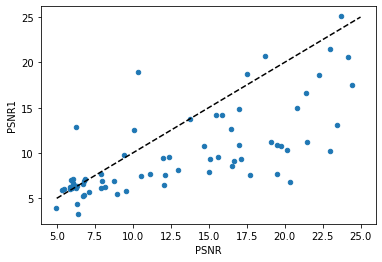

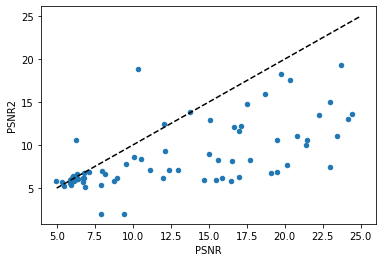

In [11]:
#plt.plot(clusters_with_negative_inner_product[])
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

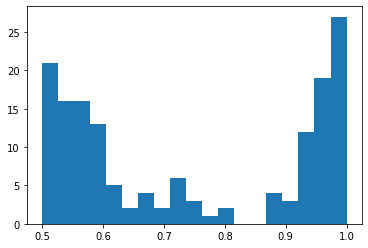

In [12]:
bins = np.linspace(0.5, 1, 20)
plt.hist(clusters["max_weight"], bins=bins)
#clusters["max_weight"].hist()
#plt.
plt.savefig("{}/max_weight_hist.png".format(folder_name))

In [13]:
# clusters["inner_product"].hist()
# plt.savefig("{}/inner_product_hist.png".format(folder_name))

### histogram of  innerproduct for each cell type

In [14]:
## Combine with cell type info
# cell_type = pd.DataFrame({"channel_name": info["channel_names"],
#                           "cell_type":   info["cell_types"]})
# cell_type

# clusters = clusters.merge(cell_type, on="channel_name", how="outer")

# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22c1be10>,
      dtype=object)

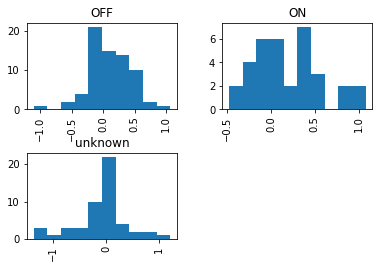

In [15]:
# clusters
#info["cell_types"]
#clusters.groupby("cell_type").hist()
clusters["inner_product"].hist(by=clusters["cell_type"])

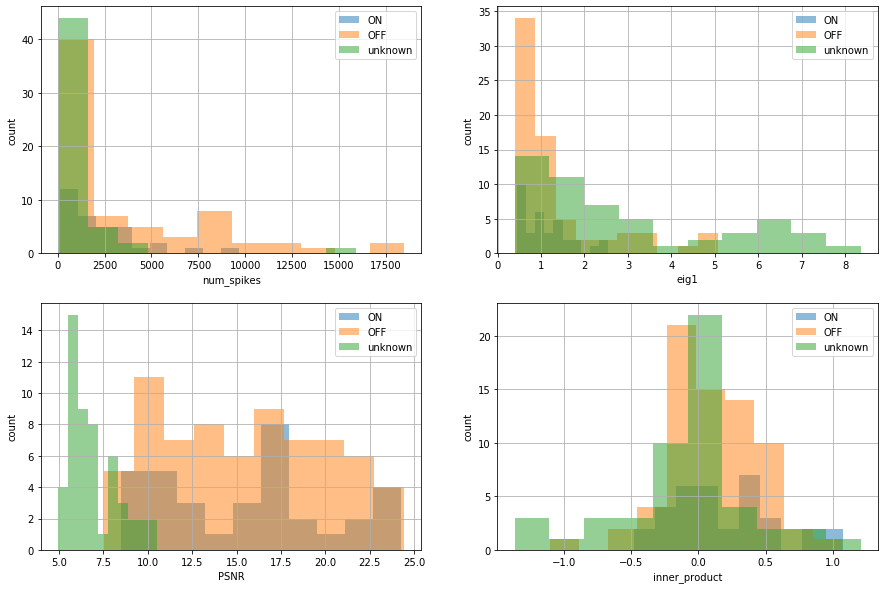

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_histogram_by_cell_type(clusters, "num_spikes")
plt.subplot(222)
pysta.plot_histogram_by_cell_type(clusters, "eig1")
plt.subplot(223)
pysta.plot_histogram_by_cell_type(clusters, "PSNR")
plt.subplot(224)
pysta.plot_histogram_by_cell_type(clusters, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.pdf".format(dataset_name, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.png".format(dataset_name, tap, cluster_dim))

## Focus on data with enough samples

51
OFF        29
ON         15
unknown     7
Name: cell_type, dtype: int64


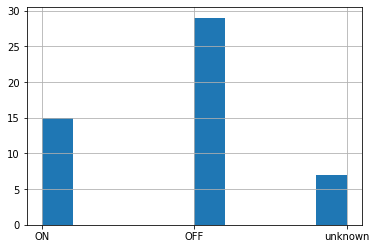

In [17]:
idx_enough_samples = clusters["num_spikes"]>512*4
clusters_with_enough_samples = clusters.loc[idx_enough_samples]

print(len(clusters_with_enough_samples))

print(clusters_with_enough_samples["cell_type"].value_counts())

clusters_with_enough_samples["cell_type"].hist()

In [18]:
idx_unknown = clusters_with_enough_samples["cell_type"]=="unknown"

clusters_with_enough_samples.loc[idx_unknown]

# clusters_with_enough_samples.loc[idx_unknown].to_csv("{}_tap{}_cluster_with_enough_samples_dim{}_unknown.csv".format(dataset_name, tap, dim))

,channel_name,num_spikes,cell_type,PSNR,eig1,eig2,eig3,converged,PSNR1,PSNR2,weight1,weight2,inner_product,max_weight
25,22b,2413,unknown,6.267735,0.835159,0.782430,0.732217,True,12.865903,10.592013,0.380812,0.619188,-0.312358,0.619188
64,36c,4098,unknown,10.318830,0.798256,0.620102,0.613533,True,18.892517,18.855896,0.524121,0.475879,-0.555696,0.524121
76,42a,15907,unknown,5.962683,0.396756,0.395866,0.390809,True,6.222633,6.069061,0.501863,0.498137,-0.237272,0.501863
104,56b,2961,unknown,6.055893,0.521560,0.518974,0.517117,True,7.118333,5.784867,0.491094,0.508906,-0.293164,0.508906
107,61b,2148,unknown,9.815396,0.679410,0.648867,0.636470,True,6.081757,8.977552,0.442071,0.557929,0.007384,0.557929
108,62a,4582,unknown,8.960171,0.491259,0.482335,0.479522,True,5.447929,6.125527,0.497685,0.502315,-0.258106,0.502315
137,76a,2444,unknown,10.540886,0.691615,0.672735,0.657171,True,7.507529,8.382426,0.443293,0.556707,-0.009078,0.556707


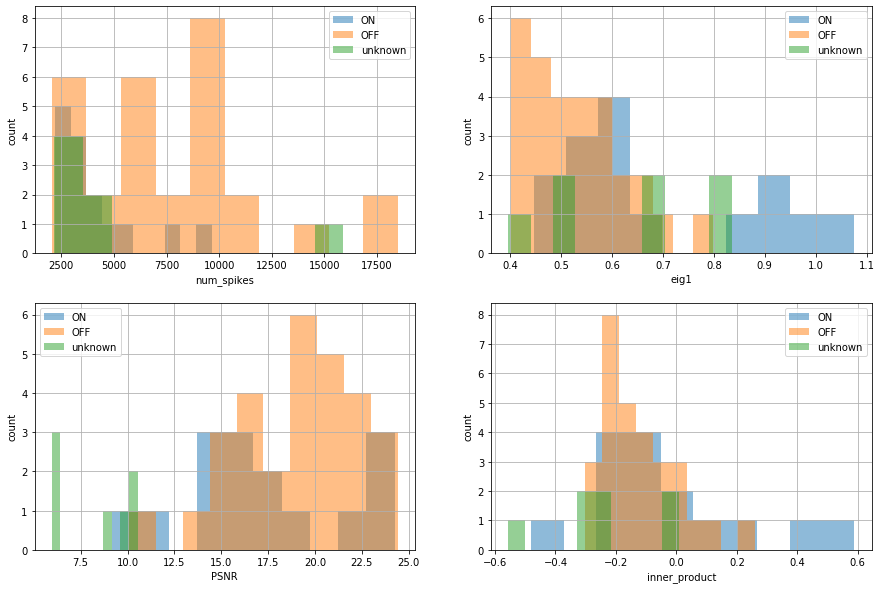

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "num_spikes")
plt.subplot(222)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "eig1")
plt.subplot(223)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "PSNR")
plt.subplot(224)
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.pdf".format(dataset_name, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.png".format(dataset_name, tap, cluster_dim))

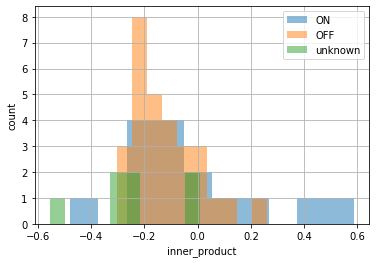

In [20]:
# plot inner product only
pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.png".format(dataset_name, tap, cluster_dim))
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.pdf".format(dataset_name, tap, cluster_dim))

dim= 2
20180626 22b


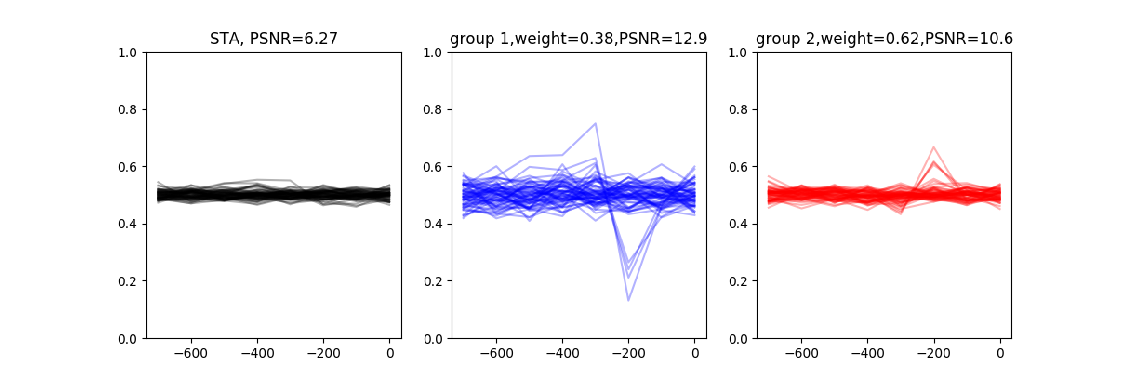

dim= 3
20180626 22b


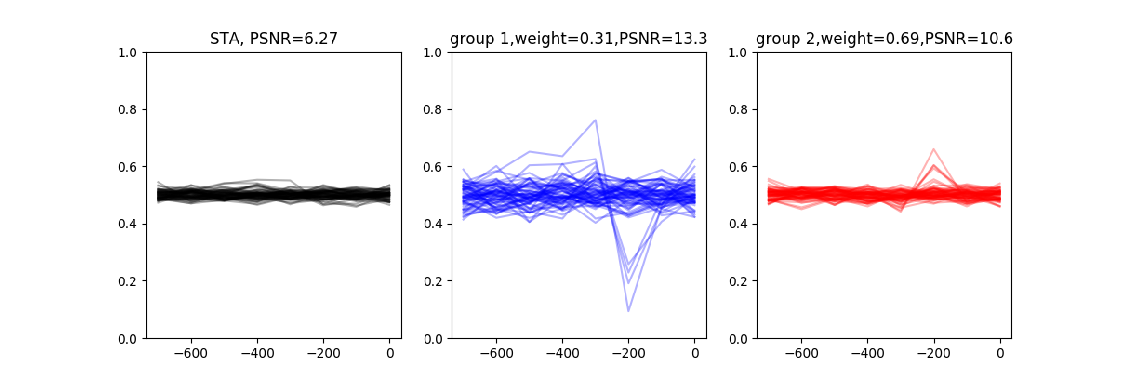

dim= 4
20180626 22b


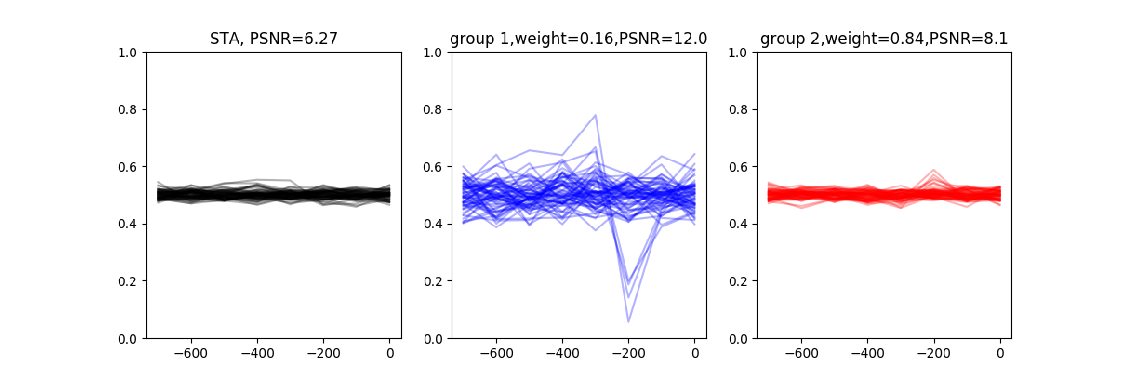

dim= 5
20180626 22b


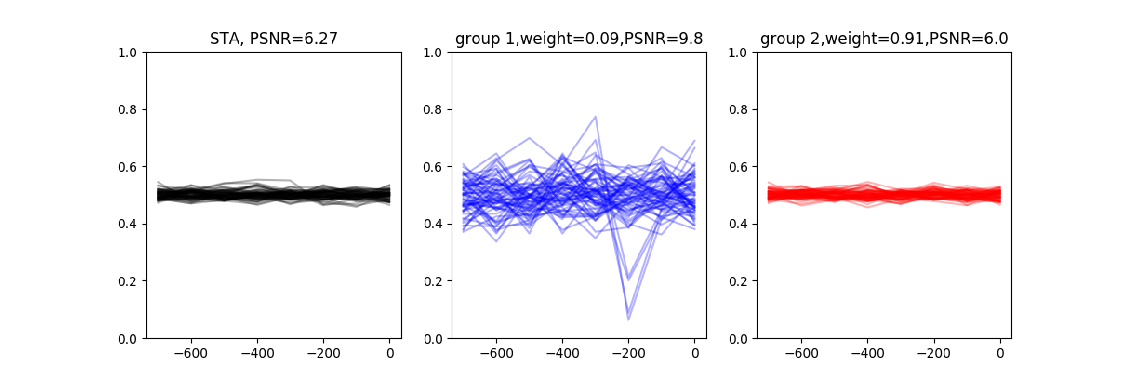

In [21]:
base_folder_name =  folder_name[:-1]
channel_name = "22b"
# channel_name = "36c"
# channel_name = "62b"

# channel_name = "42a"
# channel_name = "56b"
# channel_name = "62a"
for d in range(2, 6):
    print("dim=",d)
    print(dataset_name, channel_name)
    im = plt.imread(os.path.join(base_folder_name + "{}".format(d), channel_name + "_centers.png"))
    
    plt.figure(figsize=(20,8))
    plt.imshow(im)
    plt.box('off')
    plt.axis('off')
    plt.show()

dim= 2
20180626 22b
dim= 3
20180626 22b
dim= 4
20180626 22b
dim= 5
20180626 22b


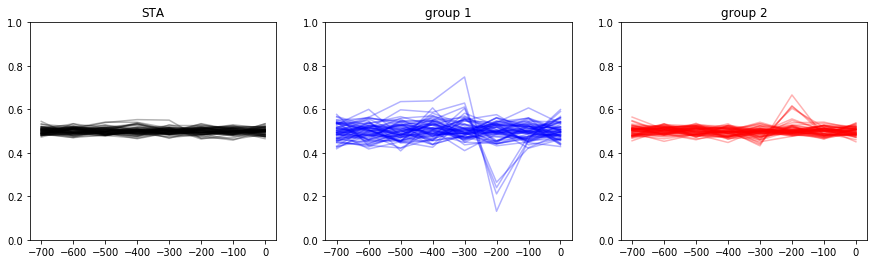

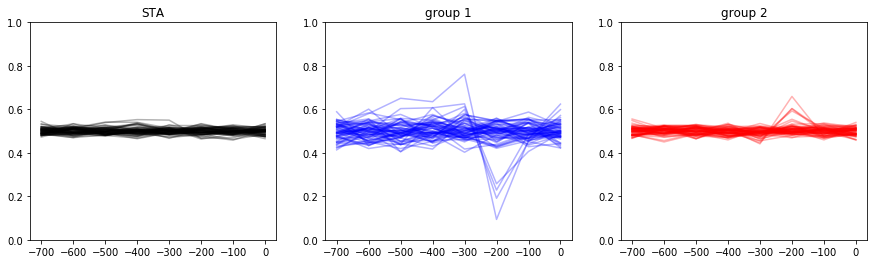

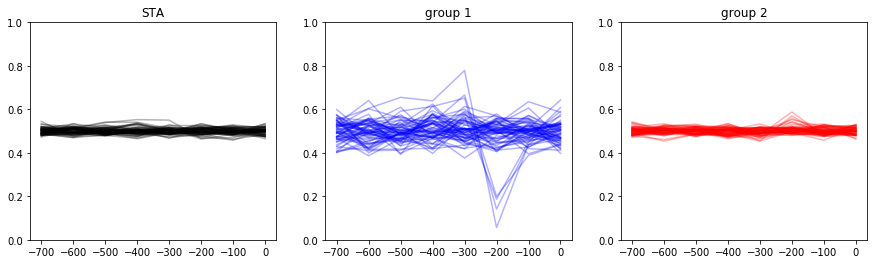

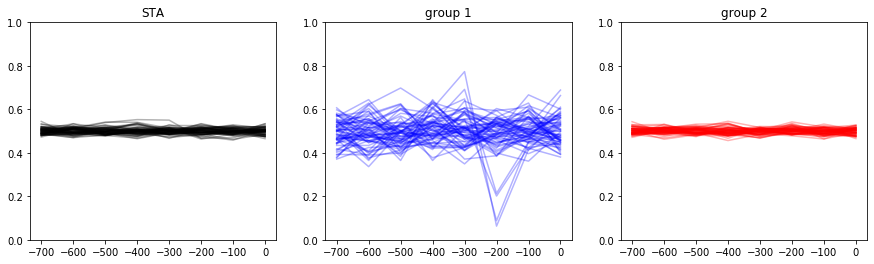

In [29]:
base_folder_name =  folder_name[:-1]
channel_name = "22b"
# channel_name = "36c"
# channel_name = "62b"

# channel_name = "42a"
# channel_name = "56b"
# channel_name = "62a"
for d in range(2, 6):
    print("dim=",d)
    print(dataset_name, channel_name)
    centers = np.load(os.path.join(base_folder_name + "{}".format(d), channel_name + ".npz"))
    
    sta = centers['sta']
    group_centers = centers['group_centers']
    
    # plot group_centers
    dt = 100
    grid_T = np.linspace(-tap + 1, 0, tap) * dt
    stcl.plot_centers(sta, group_centers, grid_T)
#     stcl.plot_centers(sta, group_centers, grid_T, cl.weights_, PSNR, [PSNR0, PSNR1])

#     plt.figure(figsize=(20,8))
#     plt.imshow(im)
#     plt.box('off')
#     plt.axis('off')
#     plt.show()

## paired t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [24]:
# from scipy import stats

In [25]:
# stats.ttest_rel(clusters_dim2["max_weight"], clusters_dim2["max_weight"])

In [26]:
# stats.ttest_rel(clusters_dim2["inner_product"], clusters_dim2["inner_product"])